In [143]:
# Necessary packages 
!pip install seaborn
!pip install scikit-learn

In [164]:
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [ ]:
# Project: Soccer UEFA European Championship Data Analysis and Predictions

# Objective: Analyze the UEFA European Championship match statistics to determine 
#             what aspects of the game impact a team's ability to win the greatest and
#             using these aspects to make reliable predictions as to what team will win in future games.

# Source of Data: kaggle.com

In [165]:
# Load Dataset
df = pd.read_csv("EuroAllMatchBoxData.csv")
df.head()
# Cleaning data by removing incorrect/empty columns of data
subset_df = df[203:1397]

In [3]:
df["goal_difference"] = abs(df["hgoals"] - df["agoals"])
df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves,goal_difference
0,2002,Faroe Islands,Scotland,2,2,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0
1,2002,Norway,Denmark,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2002,Armenia,Ukraine,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2002,Russia,Republic of Ireland,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
4,2002,Cyprus,France,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [4]:
num_rows = len(df)
print(num_rows)

1397


In [9]:
# Quick test for correlation between column variables
subset_df[["hshots", "hfouls", "hshotsOnTarget", "hgoals"]].corr()

,hshots,hfouls,hshotsOnTarget,hgoals
hshots,1.000000,0.154825,0.822909,0.421646
hfouls,0.154825,1.000000,0.104106,-0.143550
hshotsOnTarget,0.822909,0.104106,1.000000,0.497426
hgoals,0.421646,-0.143550,0.497426,1.000000


In [153]:
# Function for creating match result column
def match_result(row):
    if row['hgoals'] > row['agoals']:
        return 'Home win'
    elif row['agoals'] > row['hgoals']:
        return 'Away win'
    else:
        return 'Draw'
subset_df['result'] = subset_df.apply(match_result, axis = 1)

In [21]:
subset_df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves,result
203,2004,Spain,Russia,1,0,61,39,8,5,16,8,3,5,0,1,10,19,5,9,Home win
204,2004,Switzerland,Croatia,0,0,41,59,6,7,10,18,3,5,1,0,22,15,9,5,Draw
205,2004,France,England,2,1,52,48,6,2,16,6,2,3,0,0,16,18,2,8,Home win
206,2004,Denmark,Italy,0,0,54,46,9,4,10,8,2,4,0,0,10,13,7,6,Draw
207,2004,Sweden,Bulgaria,5,0,46,54,9,2,15,11,2,4,0,0,20,19,3,5,Home win


In [154]:
# Creates new column that determines which team has more shots
def more_shots(row):
    if row['hshots'] > row['ashots']:
        return 'Home'
    elif row['ashots'] > row['hshots']:
        return 'Away'
    else:
        return 'Equal'
subset_df['more_shots_team'] = df.apply(more_shots, axis = 1)
subset_df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,...,hyellowCards,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves,result,more_shots_team
203,2004,Spain,Russia,1,0,61,39,8,5,16,...,3,5,0,1,10,19,5,9,Home win,Home
204,2004,Switzerland,Croatia,0,0,41,59,6,7,10,...,3,5,1,0,22,15,9,5,Draw,Away
205,2004,France,England,2,1,52,48,6,2,16,...,2,3,0,0,16,18,2,8,Home win,Home
206,2004,Denmark,Italy,0,0,54,46,9,4,10,...,2,4,0,0,10,13,7,6,Draw,Home
207,2004,Sweden,Bulgaria,5,0,46,54,9,2,15,...,2,4,0,0,20,19,3,5,Home win,Home


In [155]:
# New column that returns a true or false value based on whether the team with more shots won or lost
subset_df['shots_team_won'] = (((subset_df['more_shots_team'] == 'Home') & (subset_df['result'] == 'Home win')) | ((subset_df['more_shots_team'] == 'Away') & (subset_df['result'] == 'Away win')))

In [27]:
subset_df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,...,ayellowCards,hredCards,aredCards,hfouls,afouls,hsaves,asaves,result,more_shots_team,shots_team_won
203,2004,Spain,Russia,1,0,61,39,8,5,16,...,5,0,1,10,19,5,9,Home win,Home,True
204,2004,Switzerland,Croatia,0,0,41,59,6,7,10,...,5,1,0,22,15,9,5,Draw,Away,False
205,2004,France,England,2,1,52,48,6,2,16,...,3,0,0,16,18,2,8,Home win,Home,True
206,2004,Denmark,Italy,0,0,54,46,9,4,10,...,4,0,0,10,13,7,6,Draw,Home,False
207,2004,Sweden,Bulgaria,5,0,46,54,9,2,15,...,4,0,0,20,19,3,5,Home win,Home,True


In [32]:
shot_win_rate = subset_df['shots_team_won'].mean() * 100
shot_win_rate

np.float64(58.458961474036855)

In [156]:
# Creates new column that shows the difference in possession between the home and away teams
subset_df['possession_diff'] = subset_df['hPossesion'] - subset_df['aPossesion']
subset_df.head()


,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,...,hredCards,aredCards,hfouls,afouls,hsaves,asaves,result,more_shots_team,shots_team_won,possession_diff
203,2004,Spain,Russia,1,0,61,39,8,5,16,...,0,1,10,19,5,9,Home win,Home,True,22
204,2004,Switzerland,Croatia,0,0,41,59,6,7,10,...,1,0,22,15,9,5,Draw,Away,False,-18
205,2004,France,England,2,1,52,48,6,2,16,...,0,0,16,18,2,8,Home win,Home,True,4
206,2004,Denmark,Italy,0,0,54,46,9,4,10,...,0,0,10,13,7,6,Draw,Home,False,8
207,2004,Sweden,Bulgaria,5,0,46,54,9,2,15,...,0,0,20,19,3,5,Home win,Home,True,-8


In [157]:
# Organizing possession difference into categories and then relating the categories to how it impacts a win or loss 

bins = [-100, -20, -10, 10, 20, 100]
labels = [
'Away High',
'Away Slight',
'Even',
'Home Slight',
'Home High'
]

subset_df['possession_range'] = pd.cut(subset_df['possession_diff'], bins=bins, labels=labels)

def possession_win(row): 
    if row['possession_diff'] > 0 and row['result'] == 'Home win':
        return True
    elif row['possession_diff'] < 0 and row['result'] == 'Away win':
        return True
    else:
        return False

subset_df['possession_team_won'] = subset_df.apply(possession_win, axis = 1)



In [158]:
# Relating the possession difference ranges to the win percentage of those teams 
possession_win_rate = subset_df.groupby('possession_range')['possession_team_won'].mean() * 100
possession_win_rate

possession_range
Away High      66.049383
Away Slight    47.899160
Even           25.084746
Home Slight    68.217054
Home High      77.083333
Name: possession_team_won, dtype: float64

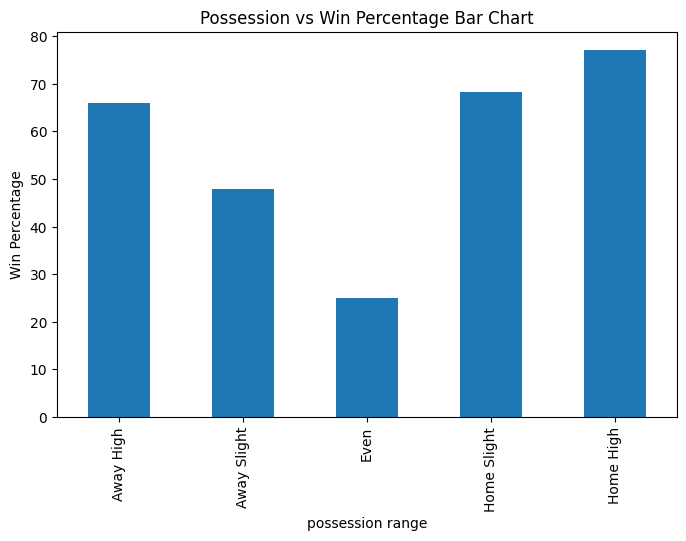

In [50]:
# Bar chart showing correlation between the possession difference ranges and the corresponding win percentages
possession_win_rate.plot(kind = 'bar', figsize=(8, 5))
plt.xlabel("possession range")
plt.ylabel("Win Percentage")
plt.title("Possession vs Win Percentage Bar Chart")
plt.show()

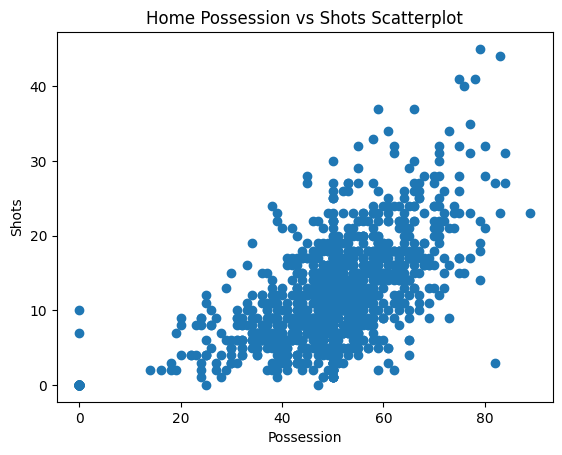

In [146]:


# Scatterplot to show correlation between home teams possession and shots 
x = subset_df['hPossesion']
y = subset_df['hshots']
plt.scatter(x,y)
plt.xlabel("Possession")
plt.ylabel("Shots")
plt.title("Home Possession vs Shots Scatterplot")
plt.show()

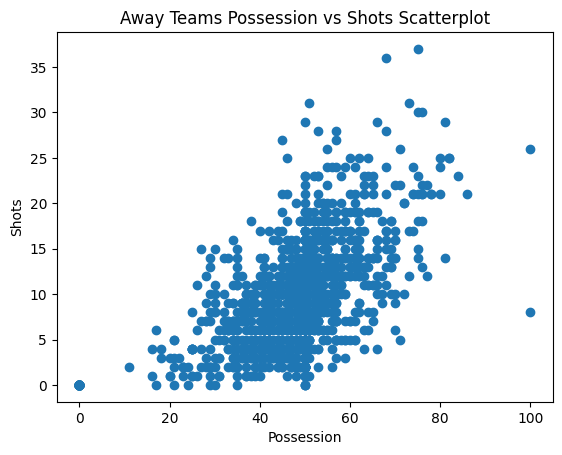

In [147]:
# Scatterplot to show correlation between away teams possession and shots 
x = subset_df['aPossesion']
y = subset_df['ashots']
plt.scatter(x,y)
plt.xlabel("Possession")
plt.ylabel("Shots")
plt.title("Away Teams Possession vs Shots Scatterplot")
plt.show()

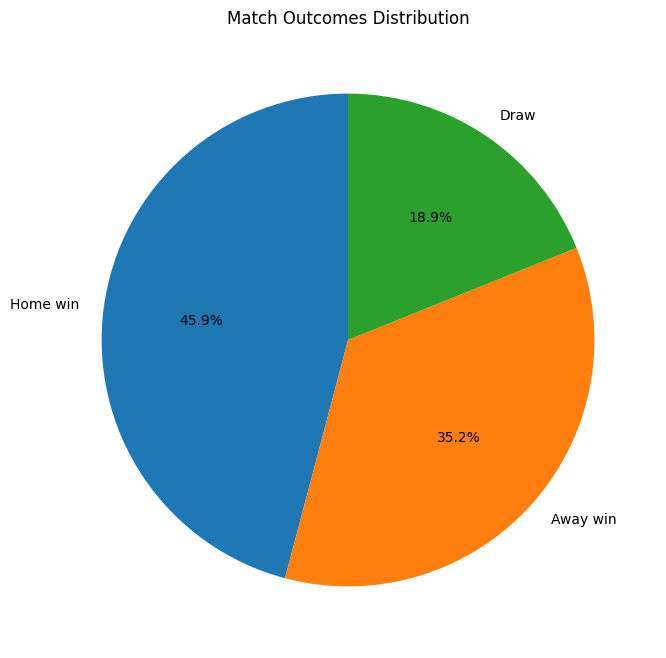

In [53]:
# Pie Chart to show how homefield advantage can factor in to winning
plt.figure(figsize=(8,8))
result_count = df['result'].value_counts()
plt.pie(result_count, labels=result_count.index, autopct = '%1.1f%%', startangle = 90)
plt.title("Match Outcomes Distribution")
plt.show()

In [159]:
# Creating a shot difference column and then grouping it into 5 categories to relate it to win percentage
subset_df['shot_diff'] = subset_df['hshots'] - subset_df['ashots']
subset_df.head()

bins2 = [-9, -4, -1, 1, 4, 9]
labels2 = [
'Away High ',
'Away Slight',
'Even',
'Home Slight',
'Home High'
]

subset_df['shot_range'] = pd.cut(subset_df['shot_diff'], bins=bins2, labels=labels2)

def shot_win(row): 
    if row['shot_diff'] > 0 and row['result'] == 'Home win':
        return True
    elif row['shot_diff'] < 0 and row['result'] == 'Away win':
        return True
    else:
        return False

subset_df['shot_team_won'] = subset_df.apply(shot_win, axis = 1)

shot_win_rate = subset_df.groupby('shot_range')['shot_team_won'].mean() * 100
shot_win_rate

shot_range
Away High      58.083832
Away Slight    49.074074
Even           16.993464
Home Slight    53.719008
Home High      58.333333
Name: shot_team_won, dtype: float64

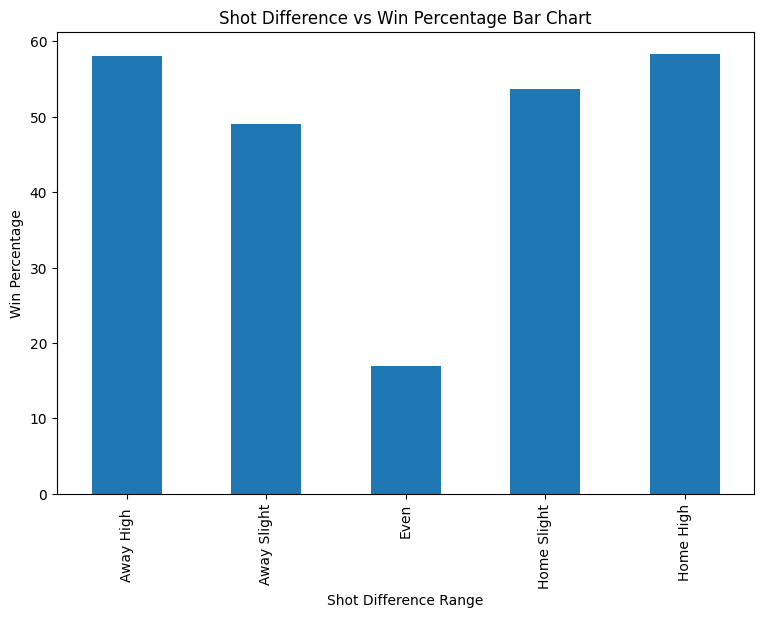

In [58]:
# Bar chart to show correlation between shot difference and win percentage
shot_win_rate.plot(kind = 'bar', figsize=(9, 6))
plt.xlabel("Shot Difference Range")
plt.ylabel("Win Percentage")
plt.title("Shot Difference vs Win Percentage Bar Chart")
plt.show()

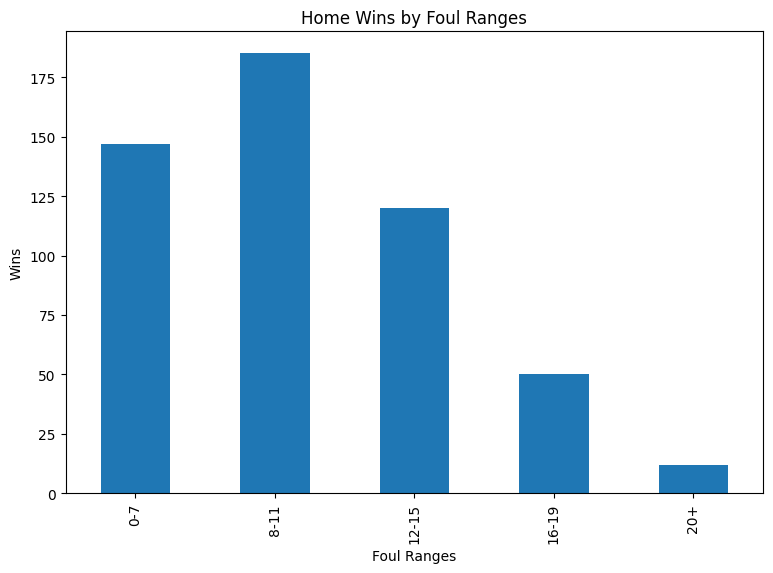

In [160]:
# Grouping home team fouls into ranges and then relating these ranges to the amount of wins they correspond to
bins3 = [0, 8, 12, 16, 20, 30]
labels3 = [
'0-7',
'8-11',
'12-15',
'16-19',
'20+'
]


def get_win(row): 
    if row['hgoals'] > row['agoals']:
        return 1
    elif row['agoals'] > row['hgoals']:
        return 0
    else:
        return False

subset_df['get_win'] = subset_df.apply(get_win, axis=1)


subset_df['foul_range'] = pd.cut(subset_df['hfouls'], bins = bins3, labels = labels3)
win_by_fouls = subset_df.groupby('foul_range')['get_win'].sum()

# Bar chart relating the home team foul ranges and amount of wins
win_by_fouls.plot(kind = 'bar', figsize=(9, 6))
plt.xlabel("Foul Ranges")
plt.ylabel("Wins")
plt.title("Home Wins by Foul Ranges")
plt.show()
                     

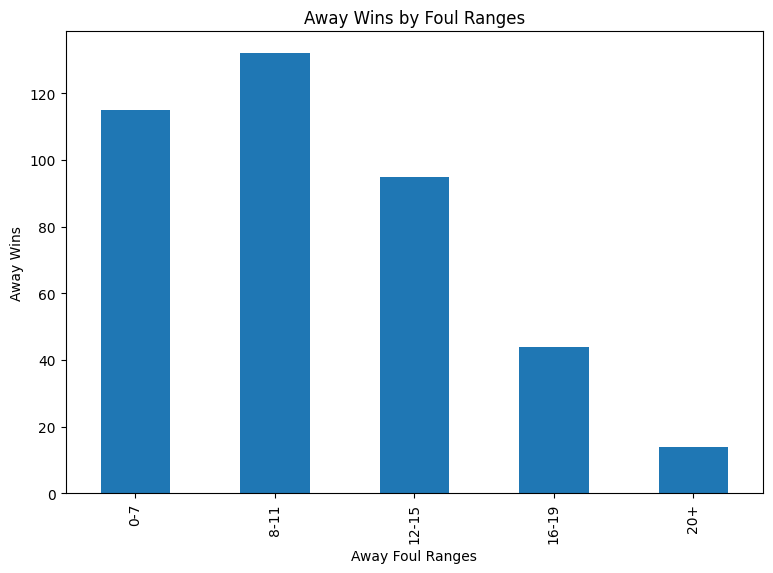

In [161]:
# Grouping away team fouls into ranges and then relating these ranges to the amount of wins they correspond to
bins3 = [0, 8, 12, 16, 20, 30]
labels3 = [
'0-7',
'8-11',
'12-15',
'16-19',
'20+'
]


def get_win(row): 
    if row['hgoals'] > row['agoals']:
        return 0
    elif row['agoals'] > row['hgoals']:
        return 1
    else:
        return False

subset_df['get_win'] = subset_df.apply(get_win, axis=1)


subset_df['foul_range'] = pd.cut(subset_df['afouls'], bins = bins3, labels = labels3)
win_by_fouls = subset_df.groupby('foul_range')['get_win'].sum()

# Bar chart relating the away team foul ranges and amount of wins
win_by_fouls.plot(kind = 'bar', figsize=(9, 6))
plt.xlabel("Away Foul Ranges")
plt.ylabel("Away Wins")
plt.title("Away Wins by Foul Ranges")
plt.show()


In [78]:
print(win_by_fouls)

foul_range
0-7      0
8-11     0
12-15    0
16-19    0
20+      0
Name: home_win, dtype: int64


In [85]:
print(win_by_fouls)

foul_range
0-7      0
8-11     0
12-15    0
16-19    0
20+      0
Name: get_win, dtype: int64


In [88]:
print(win_by_fouls)

foul_range
0-7      0
8-11     0
12-15    0
16-19    0
20+      0
Name: get_win, dtype: int64


In [91]:
print(win_by_fouls)

foul_range
0-7      0
8-11     0
12-15    0
16-19    0
20+      0
Name: home_win, dtype: int64


In [93]:
subset_df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,...,possesion_diff,possession_diff,possession_team_won,possession_range,shot_diff,shot_range,shot_team_won,foul_range,home_win,get_win
203,2004,Spain,Russia,1,0,61,39,8,5,16,...,22,22,True,Home High,8,Home High,True,8-11,0,0
204,2004,Switzerland,Croatia,0,0,41,59,6,7,10,...,-18,-18,False,Away Slight,-8,Away High,False,20+,0,0
205,2004,France,England,2,1,52,48,6,2,16,...,4,4,True,Even,10,NaN,True,12-15,0,0
206,2004,Denmark,Italy,0,0,54,46,9,4,10,...,8,8,False,Even,2,Home Slight,False,8-11,0,0
207,2004,Sweden,Bulgaria,5,0,46,54,9,2,15,...,-8,-8,False,Even,4,Home Slight,True,16-19,0,0


In [94]:
subset_df.head()

,year,hname,aname,hgoals,agoals,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,...,possesion_diff,possession_diff,possession_team_won,possession_range,shot_diff,shot_range,shot_team_won,foul_range,home_win,get_win
203,2004,Spain,Russia,1,0,61,39,8,5,16,...,22,22,True,Home High,8,Home High,True,8-11,0,0
204,2004,Switzerland,Croatia,0,0,41,59,6,7,10,...,-18,-18,False,Away Slight,-8,Away High,False,20+,0,0
205,2004,France,England,2,1,52,48,6,2,16,...,4,4,True,Even,10,NaN,True,12-15,0,0
206,2004,Denmark,Italy,0,0,54,46,9,4,10,...,8,8,False,Even,2,Home Slight,False,8-11,0,0
207,2004,Sweden,Bulgaria,5,0,46,54,9,2,15,...,-8,-8,False,Even,4,Home Slight,True,16-19,0,0


In [95]:
print((subset_df['result'] == 'Home win').sum())

0


In [96]:
print(subset_df.dtypes)

year                      int64
hname                    object
aname                    object
hgoals                    int64
agoals                    int64
hPossesion                int64
aPossesion                int64
hshotsOnTarget            int64
ashotsOnTarget            int64
hshots                    int64
ashots                    int64
hyellowCards              int64
ayellowCards              int64
hredCards                 int64
aredCards                 int64
hfouls                    int64
afouls                    int64
hsaves                    int64
asaves                    int64
result                  float64
more_shots_team          object
shots_team_won             bool
possesion_diff            int64
possession_diff           int64
possession_team_won        bool
possession_range       category
shot_diff                 int64
shot_range             category
shot_team_won              bool
foul_range             category
home_win                  int64
get_win 

In [97]:
print(subset_df['result'].unique())

[nan]


In [98]:
print(subset_df['result'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: result, dtype: float64


In [100]:
def match_result(row):
    if row['hgoals'] > row['agoals']:
        return 'Home win'
    elif row['agoals'] > row['hgoals']:
        return 'Away win'
    else:
        return 'Draw'
subset_df['result'] = subset_df.apply(match_result, axis = 1)


In [124]:

# Creating x and y values for logistic regression and creating testing and training datasets
subset_df['win'] = subset_df['result'].map({'Home win': 1, 'Away win': 0, 'Draw': 0})
X = subset_df[['hshotsOnTarget', 'hPossesion', 'hfouls']]
y = subset_df['win']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)



In [125]:
# Selecting logistic regression and running it with data 
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [126]:
# Setting up the prediction models
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [127]:
# How accurate our model predictions are
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6822742474916388


In [128]:
# Confusion matrix for our model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129  34]
 [ 61  75]]


In [162]:
# Predicting the outcome for a match with a home team with 10 shots on target, 70% possession, and 11 fouls
x_new = [[10, 70, 11 ]]
y_pred = model.predict(x_new)
print("Will they win?", "Yes" if y_pred[0] ==1 else "No")

Will they win? Yes


In [166]:
# Giving the actual probability/percentage for the home team winning
y_prob = model.predict_proba(x_new)[:, 1]
print("The chance of winning is", y_prob[0]*100, "%")


The chance of winning is 82.7781885859981 %
